##### Copyright 2018 The TensorFlow Probability Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License"); { display-mode: "form" }
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Distributions: 간단한 소개

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/probability/examples/TensorFlow_Distributions_Tutorial"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a>   </td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/probability/examples/TensorFlow_Distributions_Tutorial.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/probability/examples/TensorFlow_Distributions_Tutorial.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/probability/examples/TensorFlow_Distributions_Tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
</table>

이 노트북에서는 TensorFlow Distributions(줄여서 TFD)를 살펴보겠습니다. 이 노트북의 목표는 TFD의 텐서 형상 처리에 대한 이해를 포함하여 학습 곡선을 부드럽게 끌어올리는 것입니다. 이 노트북에서는 추상적인 개념보다는 예제를 먼저 제시하려고 합니다. 먼저 작업을 수행하는 표준적인 쉬운 방법을 제시하고 가장 일반적인 추상적 관점은 마지막으로 미룹니다. 더 추상적이고 참조 스타일의 튜토리얼을 선호하는 유형이라면 [TensorFlow Distributions 형상 이해하기](https://github.com/tensorflow/probability/blob/main/tensorflow_probability/examples/jupyter_notebooks/Understanding_TensorFlow_Distributions_Shapes.ipynb)를 확인해 보세요. 여기에 있는 자료와 관련하여 질문이 있는 경우 주저하지 말고 [TensorFlow Probability 메일링 리스트](https://groups.google.com/a/tensorflow.org/forum/#!forum/tfprobability)에 연락(또는 가입)하세요. 기꺼이 도와드리겠습니다.

시작하기 전에 적절한 라이브러리를 가져와야 합니다. 전체 라이브러리는 `tensorflow_probability`입니다. 관례적으로, 분포 라이브러리를 보통 `tfd`라고 합니다.

[Tensorflow Eager](https://www.tensorflow.org/guide/eager)는 TensorFlow를 위한 명령형 실행 환경입니다. TensorFlow Eager에서 모든 TF 연산은 즉시 평가되고 결과를 생성합니다. 이것은 TF 연산이 나중에 실행되는 그래프에 노드를 추가하는 TensorFlow의 표준 "그래프" 모드와 대조됩니다. 이 전체 노트북은 TF Eager를 사용하여 작성되었지만 여기에 제시된 개념 중 어느 것도 이를 이용하지는 않으며 TFP는 그래프 모드에서 사용할 수 있습니다.

In [ ]:
import collections

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

try:
  tf.compat.v1.enable_eager_execution()
except ValueError:
  pass

import matplotlib.pyplot as plt

## 기본 일변량 분포


바로 들어가서 정규 분포를 만들어 보겠습니다.

In [3]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

다음과 같이 샘플을 추출할 수 있습니다.

In [4]:
n.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.25322816>

여러 샘플을 추출할 수 있습니다.

In [5]:
n.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4658079, -0.5653636,  0.9314412], dtype=float32)>

로그 확률을 평가할 수 있습니다.

In [6]:
n.log_prob(0.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

여러 로그 확률을 평가할 수 있습니다.

In [7]:
n.log_prob([0., 2., 4.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.9189385, -2.9189386, -8.918939 ], dtype=float32)>

광범위한 분포가 있습니다. 베르누이를 사용해 보겠습니다.

In [8]:
b = tfd.Bernoulli(probs=0.7)
b

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [9]:
b.sample()

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [10]:
b.sample(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)>

In [11]:
b.log_prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.35667497>

In [12]:
b.log_prob([1, 0, 1, 0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.35667497, -1.2039728 , -0.35667497, -1.2039728 ], dtype=float32)>

## 다변량 분포

대각선 공분산이 있는 다변량 정규 분포를 생성합니다.

In [13]:
nd = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag=[1., 4.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

이것을 이전에 만든 일변량 정규 분포와 비교하면 무엇이 다른가요? 

In [14]:
tfd.Normal(loc=0., scale=1.)

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

We see that the univariate normal has an `event_shape` of `()`, indicating it's a scalar distribution. The multivariate normal has an `event_shape` of `2`, indicating the basic [event space](https://en.wikipedia.org/wiki/Event_(probability_theory)) of this distribution is two-dimensional.

샘플링은 이전과 동일하게 작동합니다.

In [15]:
nd.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.2489667, 15.025171 ], dtype=float32)>

In [16]:
nd.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-1.5439653 ,  8.9968405 ],
       [-0.38730723, 12.448896  ],
       [-0.8697963 ,  9.330035  ],
       [-1.2541095 , 10.268944  ],
       [ 2.3475595 , 13.184147  ]], dtype=float32)>

In [17]:
nd.log_prob([0., 10])

<tf.Tensor: shape=(), dtype=float32, numpy=-3.2241714>

다변량 법선에는 일반적으로 대각 공분산이 없습니다. TFD는 여기에서 사용하는 전체 공분산 사양(공분산 행렬의 Cholesky 인수로 매개변수화됨)을 포함하여 다변량 법선을 생성하는 여러 방법을 제공합니다.

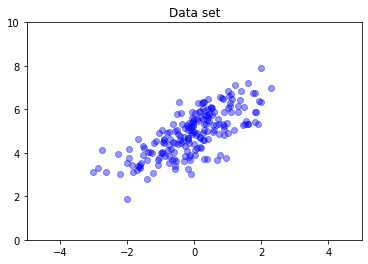

In [18]:
covariance_matrix = [[1., .7], [.7, 1.]]
nd = tfd.MultivariateNormalTriL(
    loc = [0., 5], scale_tril = tf.linalg.cholesky(covariance_matrix))
data = nd.sample(200)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.4)
plt.axis([-5, 5, 0, 10])
plt.title("Data set")
plt.show()

## 다중 분포

첫 번째 베르누이 분포는 공정한 단일 동전 뒤집기를 나타냈습니다. 단일 `Distribution` 객체에서 각각 고유한 매개변수가 있는 독립적인 베르누이 분포의 배치를 생성할 수도 있습니다.

In [19]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])
b3

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

이것이 의미하는 바를 명확히 하는 것이 중요합니다. 위의 호출은 3개의 독립적인 베르누이 분포를 정의하며, 이는 우연히도 동일한 Python `Distribution` 객체에 포함됩니다. 세 가지 분포는 개별적으로 조작할 수 없습니다. `batch_shape`가 `(3,)`여서 3개 배포의 배치를 나타내고 `event_shape`가 `()`여서 개별 배포에 일변량 이벤트 공간이 있음을 나타내는 모습에 주목하세요.

`sample`을 호출하면 세 가지 모두에서 샘플을 얻습니다.

In [20]:
b3.sample()

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 1], dtype=int32)>

In [21]:
b3.sample(6)

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=int32)>

`prob`를 호출하면, (이것은 `log_prob`와 동일한 형상 의미를 가집니다. 명확성을 위해 이러한 작은 베르누이 예제와 함께 `prob`를 사용하지만 `log_prob`가 일반적으로 애플리케이션에서 선호됨) 여기에 벡터를 전달하고 해당 값을 산출하는 각 동전의 확률을 평가할 수 있습니다.

In [22]:
b3.prob([1, 1, 0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.29999998], dtype=float32)>

API에 배치 형상이 포함된 이유는 무엇일까요? 의미적으로는 분포 목록을 만들고 `for` 루프로 반복하여 동일한 계산을 수행할 수 있습니다(적어도 Eager 모드에서는 TF 그래프 모드에서 `tf.while` 루프가 필요함). 그러나 (잠재적으로 큰) 동일하게 매개변수화된 분포 집합을 갖는 것은 매우 일반적이며 가능한 한 벡터화된 계산을 사용하는 것은 하드웨어 가속기를 사용하여 빠른 계산을 수행하는 데 있어 핵심적인 요소입니다.

## Independent를 사용하여 배치를 이벤트로 집계

이전 섹션에서 세 번의 동전 뒤집기를 나타내는 단일 `Distribution` 객체인 `b3`을 생성했습니다. 벡터 $v$에서 `b3.prob`를 호출한 경우, $i$번째 항목은 $i$번째 동전이 $v[i]$ 값을 취할 확률이었습니다.

대신 동일한 기본 패밀리의 독립 확률 변수에 대해 "결합" 분포를 지정하고 싶다고 가정합니다. 이 새로운 분포의 경우 벡터 $v$의 `prob`가 전체 동전 세트가 $v$ 벡터와 일치할 확률을 나타내는 단일 값을 반환한다는 점에서 이것은 수학적으로 다른 객체입니다.

이를 어떻게 수행해야 할까요? `Independent`라는 "고차" 분포를 사용합니다. 이 분포는 분포를 가져와 배치 형상이 이벤트 형상으로 이동된 새 분포를 생성합니다.

In [23]:
b3_joint = tfd.Independent(b3, reinterpreted_batch_ndims=1)
b3_joint

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[] event_shape=[3] dtype=int32>

형상을 원래 `b3`의 형상과 비교합니다.

In [24]:
b3

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

말했던 것처럼 이 `Independent`가 배치 형상을 이벤트 형상으로 옮겼음을 알 수 있습니다. `b3_joint`는 3차원 이벤트 공간(`event_shape = (3,)`)에 대한 단일 분포(`batch_shape = ()`)입니다.

의미를 확인하겠습니다.

In [25]:
b3_joint.prob([1, 1, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.044999998>

동일한 결과를 얻는 다른 방법은 `b3`을 사용하여 확률을 계산하고 곱셈(또는 로그 확률이 사용되는 더 일반적인 경우 합산)을 이용해 수동으로 축소하는 것입니다.

In [26]:
tf.reduce_prod(b3.prob([1, 1, 0]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.044999994>

`Indpendent`를 통해 사용자는 원하는 개념을 보다 명시적으로 표현할 수 있습니다. 꼭 필요한 것은 아니지만 매우 유용하다고 생각합니다.

재미있는 사실:

- `b3.sample`과 `b3_joint.sample`은 개념적 구현이 서로 다르지만 출력을 구별할 수 없습니다. 독립 분포 배치와 `Independent`를 사용하여 배치에서 생성된 단일 분포의 차이는 샘플링이 아니라 확률을 계산할 때 나타납니다.
- `MultivariateNormalDiag`는 스칼라 `Normal` 및 `Independent` 분포를 사용하여 간단하게 구현할 수 있습니다(실제로 이런 방식으로 구현되지는 않지만 그럴 수 있음).


## 다변량 분포 배치

3개의 전체 공분산 2차원 다변량 정규 분포 배치를 생성해 보겠습니다. 

In [27]:
covariance_matrix = [[[1., .1], [.1, 1.]], 
                      [[1., .3], [.3, 1.]],
                      [[1., .5], [.5, 1.]]]
nd_batch = tfd.MultivariateNormalTriL(
    loc = [[0., 0.], [1., 1.], [2., 2.]],
    scale_tril = tf.linalg.cholesky(covariance_matrix))
nd_batch

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[3] event_shape=[2] dtype=float32>

`batch_shape = (3,)`이므로 세 개의 독립적인 다변량 정규 분포가 있고 `event_shape = (2,)`가 있으므로 각 다변량 정규 분포는 2차원입니다. 이 예에서 개별 분포에는 독립 요소가 없습니다.

샘플링 작업:

In [28]:
nd_batch.sample(4)

<tf.Tensor: shape=(4, 3, 2), dtype=float32, numpy=
array([[[ 0.7367498 ,  2.730996  ],
        [-0.74080074, -0.36466932],
        [ 0.6516018 ,  0.9391426 ]],

       [[ 1.038303  ,  0.12231752],
        [-0.94788766, -1.204232  ],
        [ 4.059758  ,  3.035752  ]],

       [[ 0.56903946, -0.06875849],
        [-0.35127294,  0.5311631 ],
        [ 3.4635801 ,  4.565582  ]],

       [[-0.15989424, -0.25715637],
        [ 0.87479895,  0.97391707],
        [ 0.5211419 ,  2.32108   ]]], dtype=float32)>

`batch_shape = (3,)` 및 `event_shape = (2,)`이므로 `(3, 2)` 형상의 텐서를 `log_prob`로 전달합니다.

In [29]:
nd_batch.log_prob([[0., 0.], [1., 1.], [2., 2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.8328519, -1.7907217, -1.694036 ], dtype=float32)>

## 브로드캐스팅, 이것이 왜 이렇게 혼란스럽습니까?

지금까지 수행한 작업을 추상화하면 모든 분포에는 배치 형상 `B`와 이벤트 형상 `E`가 있습니다. `BE`가 이벤트 형상의 연결이라고 하겠습니다.

- 일변량 스칼라 분포 `n` 및 `b`에 대해 `BE = ().`입니다.
- 2차원 다변량 정규 분포 `nd`에 대해 `BE = (2).`입니다.
- `b3` 및 `b3_joint` 모두에 대해 `BE = (3).`입니다.
- 다변량 정규 분포 `ndb` 배치에 대해 `BE = (3, 2).`입니다.

지금까지 사용한 "평가 규칙"은 다음과 같습니다.

- 인수가 없는 샘플은 형상 `BE`인 텐서를 반환합니다. 스칼라 n으로 샘플링하면 "n x `BE`" 텐서를 반환합니다.
- `prob`와 `log_prob`는 `BE` 형상의 텐서를 취하고 `B` 형상의 결과를 반환합니다.

`prob` 및 `log_prob`에 대한 실제 "평가 규칙"은 더 복잡하며 잠재적으로 높은 성능과 속도를 제공하지만 복잡성과 도전 과제도 함께 제기합니다. 실제 규칙은 (본질적으로) <strong data-md-type="raw_html">`log_prob`에 대한 인수가 <code data-md-type="raw_html">BE</code>에 대해 <a data-md-type="raw_html" href="https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html">브로드캐스트 가능</a><em data-md-type="raw_html">해야 </em>한다는 것입니다. "추가" 차원은 출력에서 유지됩니다.</strong> 

의미를 살펴보겠습니다. 일변량 정규 분포 `n`의 경우 `BE = ()`이므로 `log_prob`는 스칼라를 예상합니다. 비어 있지 않은 형상으로 `log_prob` 텐서를 전달하면 출력에서 배치 차원으로 표시됩니다.

In [30]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [31]:
n.log_prob(0.)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [32]:
n.log_prob([0.])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.9189385], dtype=float32)>

In [33]:
n.log_prob([[0., 1.], [-1., 2.]])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.9189385, -1.4189385],
       [-1.4189385, -2.9189386]], dtype=float32)>

2차원 다변량 정규 분포 `nd`를 살펴보겠습니다(설명을 위해 매개변수를 변경함).

In [34]:
nd = tfd.MultivariateNormalDiag(loc=[0., 1.], scale_diag=[1., 1.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

`log_prob`는 형상이 `(2,)`인 인수를 "예상"하지만 이 형상에 대해 브로드캐스트하는 모든 인수를 수용합니다. 

In [35]:
nd.log_prob([0., 0.])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.337877>

그러나 "더 많은" 예를 전달하고 모든 `log_prob`를 한 번에 평가할 수 있습니다.

In [36]:
nd.log_prob([[0., 0.],
             [1., 1.],
             [2., 2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.337877 , -2.337877 , -4.3378773], dtype=float32)>

덜 매력적일 수도 있지만 이벤트 차원을 통해 브로드캐스트할 수 있습니다.

In [37]:
nd.log_prob([0.])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.337877>

In [38]:
nd.log_prob([[0.], [1.], [2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.337877 , -2.337877 , -4.3378773], dtype=float32)>

이러한 방식으로 브로드캐스트하는 것은 "가능한 한 브로드캐스트 활성화" 설계가 가져온 결과입니다. 이러한 사용법은 다소 논란의 여지가 있으며 향후 TFP 버전에서 잠재적으로 제거될 수 있습니다.

이제 세 개의 동전 예를 다시 살펴보겠습니다.

In [ ]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])

여기에서 브로드캐스트를 사용하여 *각* 동전이 앞면이 나올 확률을 나타내는 것은 매우 직관적입니다.

In [40]:
b3.prob([1])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.7       ], dtype=float32)>

(이를 `b3`이 도입된 곳에서 다시 사용했을 `b3.prob([1., 1., 1.])`와 비교합니다.)

이제 각 동전에 대해 앞면이 나올 확률 *및* 뒷면이 나올 확률을 알고 싶다고 가정합니다. 다음과 같이 시도하는 것을 생각해볼 수 있습니다.

`b3.log_prob([0, 1])`

불행히도 이것은 길고 읽기 어려운 스택 추적과 함께 오류를 발생시킵니다. `b3`에는 `BE = (3)`이 있으므로 `(3,)`에 대해 브로드캐스트 가능한 무언가에 `b3.prob`를 전달해야 합니다. `[0, 1]`은 `(2)`의 형상을 가지므로 브로드캐스트하지 않고 오류를 생성합니다. 대신 다음과 같이 말해야 합니다.

In [41]:
b3.prob([[0], [1]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.7, 0.5, 0.3],
       [0.3, 0.5, 0.7]], dtype=float32)>

왜요? `[[0], [1]]`은 `(2, 1)` 형상을 가지므로 형상 `(3)`에 대해 브로스캐스트하여 `(2, 3)`의 브로드캐스트 형상을 만듭니다.

브로드캐스팅은 매우 강력합니다. 사용되는 메모리 양을 대폭 줄일 수 있는 경우가 있으며 종종 사용자 코드를 더 짧게 만들어줍니다. 그러나 프로그래밍하기가 어려울 수 있습니다. `log_prob`를 호출하고 오류가 발생하면 거의 항상 브로드캐스트 실패가 문제입니다.

## 더 나아가기

이 튜토리얼에서 간단한 소개를 제공했기를 바랍니다. 더 나아가기 위한 몇 가지 주안점은 다음과 같습니다.

- `event_shape`, `batch_shape` 및 `sample_shape`는 임의의 순위가 될 수 있습니다(이 튜토리얼에서는 항상 스칼라 또는 순위 1임). 그러면 성능이 개선되지만 특히 브로드캐스트가 관련된 경우에 프로그래밍 문제가 다시 발생할 수 있습니다. 형상 조작에 대한 보다 심층적인 내용을 알아보려면 [TensorFlow Distributions 형상 이해하기](https://github.com/tensorflow/probability/blob/main/tensorflow_probability/examples/jupyter_notebooks/Understanding_TensorFlow_Distributions_Shapes.ipynb)를 참조하세요.
- TFP에는 `Bijectors`라는 강력한 추상화가 포함되어 있습니다. 바이젝터는 `TransformedDistribution`과 함께 기존 분포의 역변환인 새 분포를 쉽게 생성할 수 있는 유연하고 구성적인 방법을 제공합니다. 곧 이에 관한 튜토리얼을 작성할 예정이며, 그 동안 [이 문서](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/TransformedDistribution)를 확인해 보세요.
